# Covid-19 in the Philippines

Data as of February 12, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the four CSVs into one data frame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220212 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220212 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220212 - 04 Case Information_batch_2.csv', "DOH COVID Data Drop_ 20220212 - 04 Case Information_batch_3.csv"]), ignore_index=True)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Age or Birthdate is Invalid\nCase has Admittin...
3,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
4,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634363,C18989601,44.0,40 to 44,MALE,2022-02-09,2022-02-10,2022-02-12,NaN,NaN,NaN,NaN,Region III: Central Luzon,PAMPANGA,CITY OF SAN FERNANDO (CAPITAL),PH035416000,DOLORES,PH035416010,MILD,NO,NaN,NaN,NaN
3634364,C85853142,38.0,35 to 39,FEMALE,2022-02-10,2022-02-10,2022-02-12,NaN,NaN,NaN,NaN,Region IV-A: CALABARZON,LAGUNA,CITY OF SANTA ROSA,PH043428000,DILA,PH043428004,MILD,NO,NaN,NO,NaN
3634365,C13107085,28.0,25 to 29,FEMALE,2022-02-09,2022-02-10,2022-02-12,NaN,NaN,NaN,NaN,Region VII: Central Visayas,BOHOL,TAGBILARAN CITY (CAPITAL),PH071242000,TALOTO,PH071242014,MILD,NO,NaN,NO,NaN
3634366,C48800348,27.0,25 to 29,MALE,2022-02-10,2022-02-11,2022-02-12,NaN,NaN,NaN,NaN,Region VIII: Eastern Visayas,LEYTE,ORMOC CITY,PH083738000,NaN,NaN,MILD,NO,NaN,NaN,NaN


We basically combined all four CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [5]:
df['CityMunRes'] = df['CityMunRes'].str.capitalize()
df['ProvRes'] = df['ProvRes'].str.capitalize()

# Cleaning the data

## Looking for duplicates

Look for potential duplicates through the all columns. **True** means there are duplicates **across all columns.**

In [6]:
df.duplicated().value_counts()

False    3634368
dtype: int64

**No duplicated records** found in the report.

DOH, in its daily case reports, continuously clean the data and regularly reports and removes duplicates.

In the meantime, we will be **keeping the duplicates** for the purpose of our analysis. We are confident that because duplicates account for less than 1% of the total, it won't affect the overall Covid-19 picture.

In [7]:
#df[df.duplicated(keep='first')].sort_values('Age')
#This supposedly shows the duplicated entries arranged by 'Age'. Remember, these entries are checked similar
#across all columns in at least another entry. They are just arranged by age.

## Handling NaN values

There are also issues with **NaNs** which means there was no data input. One issue I stumbled upon quite belatedly was the fact that **'CaseCode'** indicator actually has a lot of null values (see below).

In [8]:
df.CaseCode.isna().value_counts()

False    3634367
True           1
Name: CaseCode, dtype: int64

One NaN detected as of this latest update. This means we can easily **resample** the cases (with the lone NaN not being included).

Previously though, there were over **60,000** null values under **CaseCode** which prompted us to use other columns (**Sex**) to analyze. Below we see however that the Sex column also has one NaN.

In [9]:
df.Sex.isna().value_counts()

False    3634367
True           1
Name: Sex, dtype: int64

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [10]:
cases = df.resample('D', on='DateRepConf').Sex.count().to_frame().reset_index()
cases.tail()

,DateRepConf,Sex
740,2022-02-08,3402
741,2022-02-09,3542
742,2022-02-10,4468
743,2022-02-11,3787
744,2022-02-12,3792


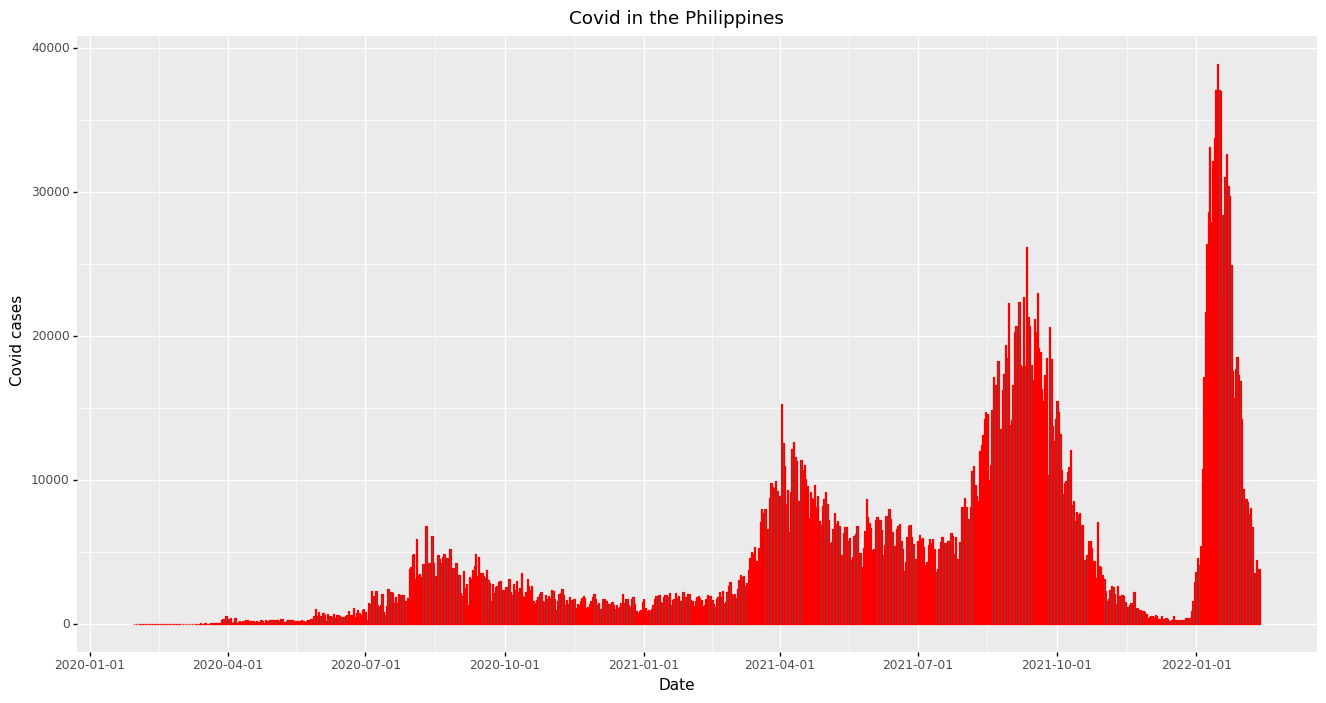

<ggplot: (366288200)>

In [11]:
(
    ggplot(cases, aes('DateRepConf', 'Sex')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [12]:
df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().round().tail(20)

DateRepConf
2022-01-24    31705.0
2022-01-25    30964.0
2022-01-26    29792.0
2022-01-27    28646.0
2022-01-28    27323.0
2022-01-29    25783.0
2022-01-30    24343.0
2022-01-31    22721.0
2022-02-01    21364.0
2022-02-02    20269.0
2022-02-03    18670.0
2022-02-04    16942.0
2022-02-05    15316.0
2022-02-06    13766.0
2022-02-07    12468.0
2022-02-08    11456.0
2022-02-09    10587.0
2022-02-10     9639.0
2022-02-11     8584.0
2022-02-12     7618.0
Freq: D, Name: Sex, dtype: float64

In [13]:
case_roll = df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().to_frame().reset_index()
case_roll.tail(10)

,DateRepConf,Sex
735,2022-02-03,18670.000000
736,2022-02-04,16941.785714
737,2022-02-05,15315.571429
738,2022-02-06,13766.000000
739,2022-02-07,12467.928571
740,2022-02-08,11456.214286
741,2022-02-09,10586.928571
742,2022-02-10,9639.285714
743,2022-02-11,8583.857143
744,2022-02-12,7617.500000


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 13 rows containing missing values.


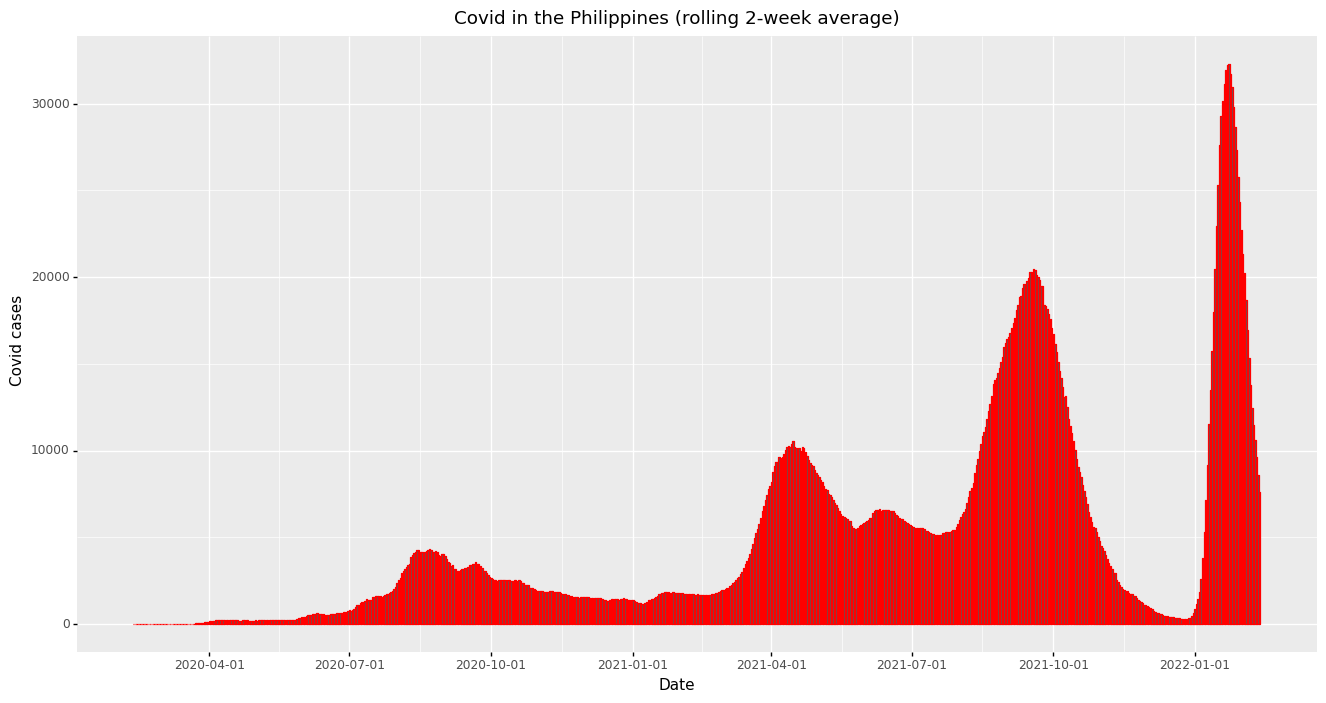

<ggplot: (366303461)>

In [14]:
(
    ggplot(case_roll, aes('DateRepConf', 'Sex')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines (rolling 2-week average)")
)

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [15]:
df.resample('D', on='DateOnset').Sex.count().tail(10)

DateOnset
2022-02-01    1703
2022-02-02    1510
2022-02-03    1194
2022-02-04    1304
2022-02-05     868
2022-02-06     624
2022-02-07     825
2022-02-08     523
2022-02-09     314
2022-02-10      41
Name: Sex, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [16]:
df.resample('D', on='DateSpecimen').Sex.count().tail(10)

DateSpecimen
2022-02-01    5466
2022-02-02    7284
2022-02-03    6072
2022-02-04    5792
2022-02-05    3512
2022-02-06    2377
2022-02-07    5024
2022-02-08    3602
2022-02-09    2661
2022-02-10     735
Name: Sex, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [17]:
df[df.HealthStatus=="RECOVERED"].resample('D', on='DateRepConf').size().tail(10)

DateRepConf
2022-02-03    6440
2022-02-04    1202
2022-02-05    1219
2022-02-06     881
2022-02-07      52
2022-02-08     372
2022-02-09      93
2022-02-10     109
2022-02-11      53
2022-02-12      89
Freq: D, dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [18]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2022-01-31    42
2022-02-01    62
2022-02-02    52
2022-02-03    45
2022-02-04    33
2022-02-05    35
2022-02-06    37
2022-02-07    35
2022-02-08    23
2022-02-09     6
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [20]:
df.RegionRes.value_counts(dropna=False)
#ROF stands for returning overseas Filipinos
#Over 3,400 (0.11%) have no indicated regional location.

NCR                               1159391
Region IV-A: CALABARZON            649416
Region III: Central Luzon          357539
Region VI: Western Visayas         189693
Region VII: Central Visayas        189128
Region II: Cagayan Valley          160807
Region XI: Davao Region            137388
Region I: Ilocos Region            131808
CAR                                117750
Region X: Northern Mindanao        104438
Region XII: SOCCSKSARGEN            73492
Region V: Bicol Region              65204
Region IX: Zamboanga Peninsula      64631
Region VIII: Eastern Visayas        63648
CARAGA                              61071
Region IV-B: MIMAROPA               43305
ROF                                 36733
BARMM                               25504
NaN                                  3422
Name: RegionRes, dtype: int64

Interpretation: Half of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [25]:
df.ProvRes.value_counts(dropna=False).head(12)
#Over 47,000 (1.3%) have no information into provincial location.

Ncr                  1153631
Cavite                215713
Laguna                162840
Rizal                 140513
Cebu                  136553
Bulacan               135271
Batangas               92212
Davao del sur          88140
Pampanga               87492
Iloilo                 76886
Negros occidental      70719
Benguet                68711
Name: ProvRes, dtype: int64

# Which municipalities?

In [27]:
df.CityMunRes.value_counts(dropna=False).head(15)
#Over 55,000 (about 1.5%) people infected have no information on their municipal location.

Quezon city            242352
City of manila         145059
City of pasig           84093
Taguig city             82872
Caloocan city           82447
City of makati          81921
Davao city              73617
City of parañaque       69834
NaN                     56387
Cebu city (capital)     54937
Pasay city              51452
City of las piñas       50120
City of valenzuela      49067
City of mandaluyong     47353
City of muntinlupa      41755
Name: CityMunRes, dtype: int64

Interpretation: Six cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

### Wide data (pivot table)

In [28]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='Sex', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov.head(10)

ProvRes,DateRepConf,Abra,Agusan del norte,Agusan del sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batanes,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines norte,Camarines sur,Camiguin,Capiz,Catanduanes,Cavite,Cebu,City of isabela (not a province),Cotabato (north cotabato),Cotabato city (not a province),Davao de oro,Davao del norte,Davao del sur,Davao occidental,Davao oriental,Dinagat islands,Eastern samar,Guimaras,Ifugao,Ilocos norte,Ilocos sur,Iloilo,Isabela,Kalinga,La union,Laguna,Lanao del norte,Lanao del sur,Leyte,Maguindanao,Marinduque,Masbate,Misamis occidental,Misamis oriental,Mountain province,Ncr,Negros occidental,Negros oriental,Northern samar,Nueva ecija,Nueva vizcaya,Occidental mindoro,Oriental mindoro,Palawan,Pampanga,Pangasinan,Quezon,Quirino,Rizal,Romblon,Samar (western samar),Sarangani,Siquijor,Sorsogon,South cotabato,Southern leyte,Sultan kudarat,Sulu,Surigao del norte,Surigao del sur,Tarlac,Tawi-tawi,Zambales,Zamboanga del norte,Zamboanga del sur,Zamboanga sibugay
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0
8,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Long data

We create a **new dataframe** for plotnine later. Long data is always preferred when processing using plotnine.

In [29]:
df_prov2 = pd.melt(df_prov, id_vars=['DateRepConf'], value_name='sex', var_name='province').sort_values('province')

In [30]:
df_prov2.sex = df_prov2.sex.astype(int)
df_prov2

,DateRepConf,province,sex
0,2020-01-30,Abra,0
469,2021-06-15,Abra,0
470,2021-06-16,Abra,0
471,2021-06-17,Abra,9
472,2021-06-18,Abra,1
...,...,...,...
59335,2020-10-28,Zamboanga sibugay,3
59336,2020-10-29,Zamboanga sibugay,8
59337,2020-10-30,Zamboanga sibugay,1
59317,2020-10-10,Zamboanga sibugay,2


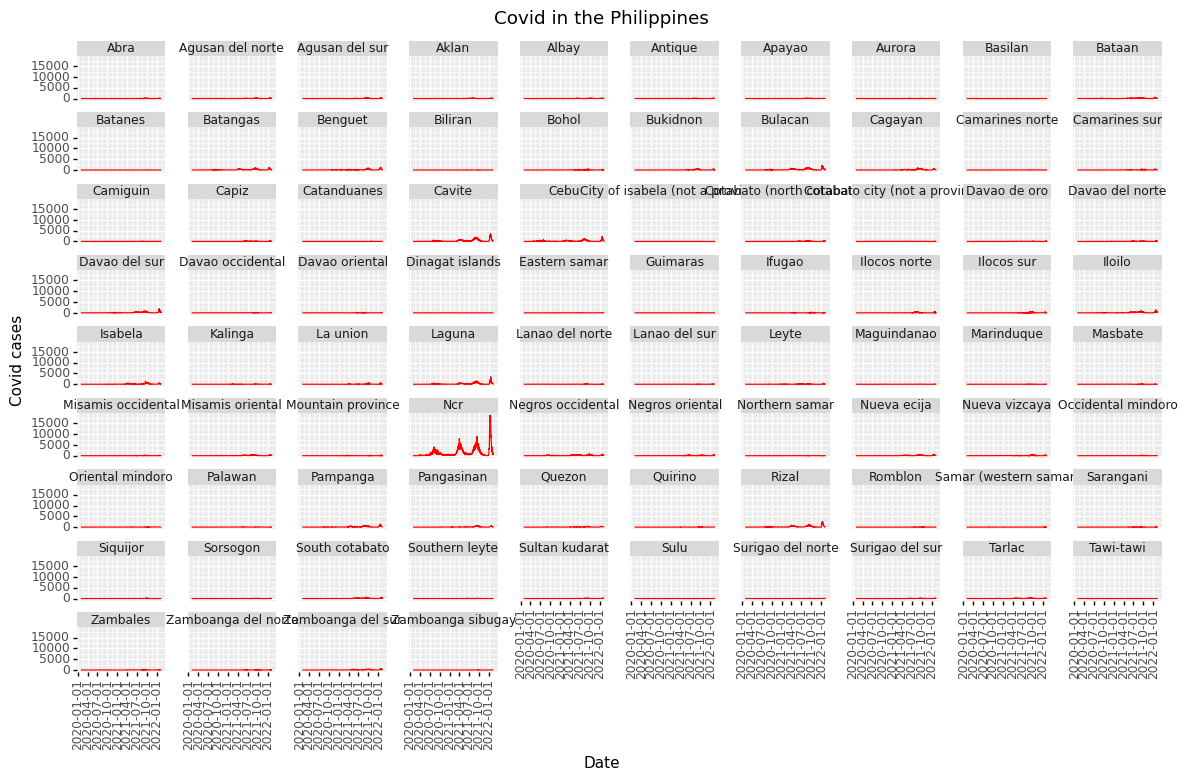

<ggplot: (366367366)>

In [31]:
#Plotnine chart
(
    ggplot(df_prov2, aes('DateRepConf', 'sex')) +
           geom_line(color="red") +
           theme(figure_size=(14,8)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Track cases per day region

### Wide data 

Similar with provincial data. We have to go through this process to be able to extract **long data** since we would have to fill some null values.

In [32]:
df_reg = df.pivot_table(columns="RegionRes", index='DateRepConf', values='Sex', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_reg.head(10)

RegionRes,DateRepConf,BARMM,CAR,CARAGA,NCR,ROF,Region I: Ilocos Region,Region II: Cagayan Valley,Region III: Central Luzon,Region IV-A: CALABARZON,Region IV-B: MIMAROPA,Region IX: Zamboanga Peninsula,Region V: Bicol Region,Region VI: Western Visayas,Region VII: Central Visayas,Region VIII: Eastern Visayas,Region X: Northern Mindanao,Region XI: Davao Region,Region XII: SOCCSKSARGEN
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,11.0,1.0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,7.0,0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0
8,2020-03-11,0,0,0,13.0,1.0,0,0,0,1.0,0,0,0,0,1.0,0,0,0,0
9,2020-03-12,0,0,0,2.0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0


### Long data

We create a new data frame solely for regional data only for processing later with plotnine for charts.

In [33]:
df_reg2 = pd.melt(df_reg, id_vars=['DateRepConf'], value_name='sex', var_name='province').sort_values('province')
df_reg2.sex = df_reg2.sex.astype(int)
df_reg2

,DateRepConf,province,sex
0,2020-01-30,BARMM,0
469,2021-06-15,BARMM,132
470,2021-06-16,BARMM,57
471,2021-06-17,BARMM,112
472,2021-06-18,BARMM,95
...,...,...,...
12343,2020-10-28,Region XII: SOCCSKSARGEN,64
12344,2020-10-29,Region XII: SOCCSKSARGEN,18
12345,2020-10-30,Region XII: SOCCSKSARGEN,43
12325,2020-10-10,Region XII: SOCCSKSARGEN,24


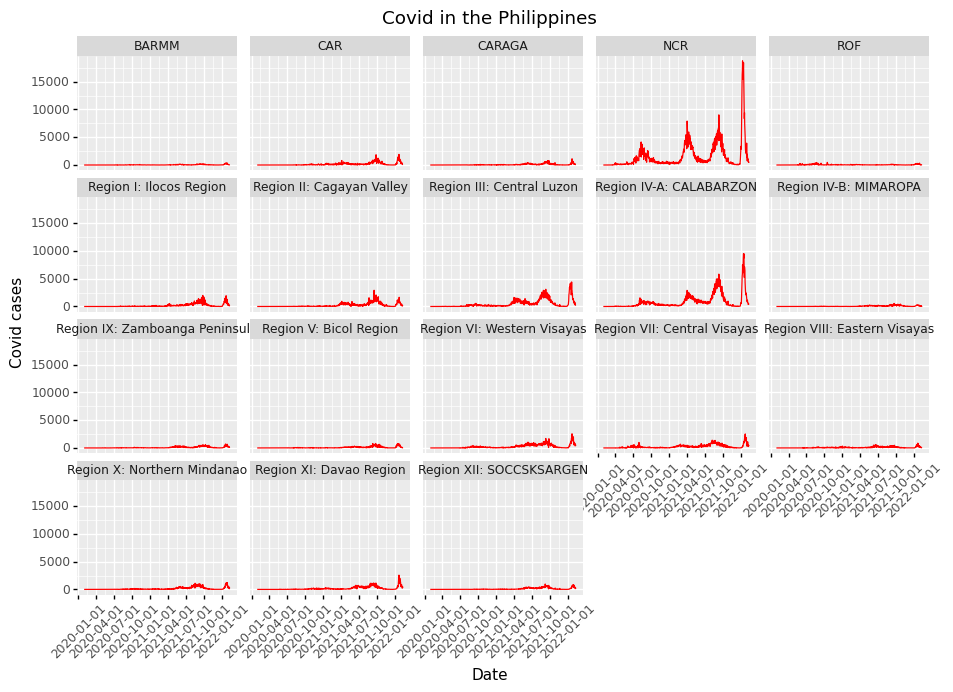

<ggplot: (367567005)>

In [34]:
plt=(
    ggplot(df_reg2, aes('DateRepConf', 'sex')) +
           geom_line(color="red", stat="identity") +
           theme(figure_size=(11,7)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.08}, axis_text_x=element_text(rotation=45)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)
plt
#ggsave(plt, "covid.svg")

# By municipality

This is quite heavy and would need some extensive data cleaning because of some municipalities with the same names. Remove the hashtags to run.

In [35]:
#df_munc = df.CityMunRes.value_counts().sort_index()
#df_munc = df.groupby("ProvRes").CityMunRes.value_counts().sort_index()
#df_munc

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [36]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-02-03     738
2022-02-04    1482
2022-02-05     855
2022-02-06    1141
2022-02-07     871
2022-02-08     628
2022-02-09     529
2022-02-10     603
2022-02-11     487
2022-02-12     562
Freq: D, Name: Sex, dtype: int64

In [37]:
#Example for municipalities
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-02-03    131
2022-02-04    319
2022-02-05    170
2022-02-06    194
2022-02-07    173
2022-02-08    124
2022-02-09     95
2022-02-10    108
2022-02-11     91
2022-02-12    123
Freq: D, Name: Sex, dtype: int64

<AxesSubplot:title={'center':'QC cases'}, xlabel='DateRepConf'>

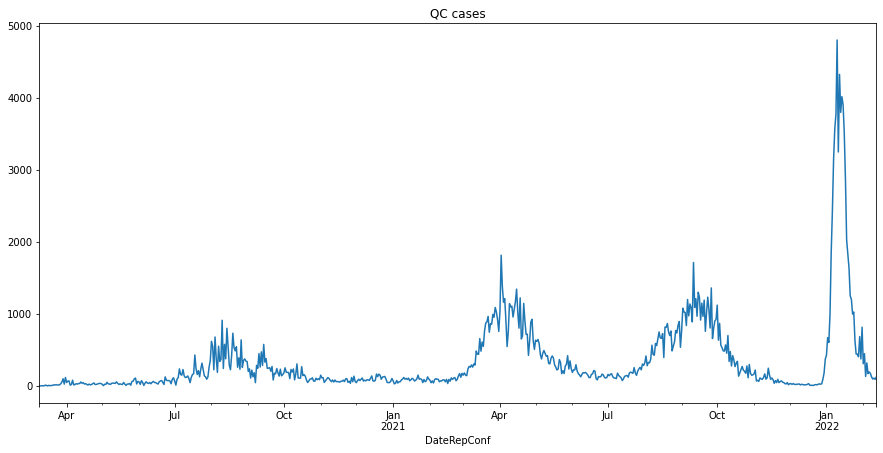

In [38]:
#Not plotnine but can be made one if made into a single df.
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().plot(title="QC cases", figsize = (15, 7))

# How young/old are the infected?

In [39]:
df.AgeGroup.value_counts(normalize=True, dropna=False)*100
#0.1% of people infected did not indicate age.

25 to 29    14.514380
30 to 34    12.917514
20 to 24    10.225657
35 to 39     9.893192
40 to 44     8.382228
45 to 49     6.868980
50 to 54     6.306626
55 to 59     5.566552
60 to 64     4.409515
15 to 19     4.287871
65 to 69     3.296116
10 to 14     2.958451
70 to 74     2.398546
0 to 4       2.351358
5 to 9       2.313139
80+          1.776815
75 to 79     1.449138
NaN          0.083921
Name: AgeGroup, dtype: float64

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [40]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    50.969632
MALE      49.030340
NaN        0.000028
Name: Sex, dtype: float64

In [41]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    2488090
NO     1032471
YES     113807
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [42]:
df_test = pd.read_csv("DOH COVID Data Drop_ 20220212 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134865,Zamboanga del Sur Medical Center PCR Laboratory,2022-02-07,48.0,15.0,15.0,8.0,7.0,0.0,0.0,3612.0,0.0,37644,37269,11164,26105,0.30,0.70,NaN
134866,Zamboanga del Sur Medical Center PCR Laboratory,2022-02-08,48.0,39.0,39.0,19.0,20.0,0.0,0.0,3553.0,0.0,37683,37308,11183,26125,0.30,0.70,NaN
134867,Zamboanga del Sur Medical Center PCR Laboratory,2022-02-09,48.0,47.0,47.0,27.0,20.0,0.0,0.0,3486.0,0.0,37730,37355,11210,26145,0.30,0.70,NaN
134868,Zamboanga del Sur Medical Center PCR Laboratory,2022-02-10,48.0,53.0,53.0,19.0,34.0,0.0,0.0,3413.0,0.0,37783,37408,11229,26179,0.30,0.70,NaN


# Transform dates to datetime format

In [43]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

# Look for null values

Again, nulls are not counted when resampling.

In [44]:
df_test.daily_output_unique_individuals.isna().value_counts()
#By individuals tested, nealry 9,900 had no values.

False    124281
True      10589
Name: daily_output_unique_individuals, dtype: int64

In [45]:
df_test.daily_output_samples_tested.isna().value_counts()
#Same with samples.

False    124279
True      10591
Name: daily_output_samples_tested, dtype: int64

# Total number of people tested for Covid-19 daily

In [46]:
#Creating a new data frame for processing with plotnine
daily_test = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().to_frame().reset_index()
daily_test.tail(12)
#shows last 12 days.

,report_date,daily_output_unique_individuals
668,2022-01-31,41011.0
669,2022-02-01,43689.0
670,2022-02-02,39694.0
671,2022-02-03,40234.0
672,2022-02-04,38893.0
673,2022-02-05,38028.0
674,2022-02-06,23930.0
675,2022-02-07,30253.0
676,2022-02-08,36714.0
677,2022-02-09,33144.0


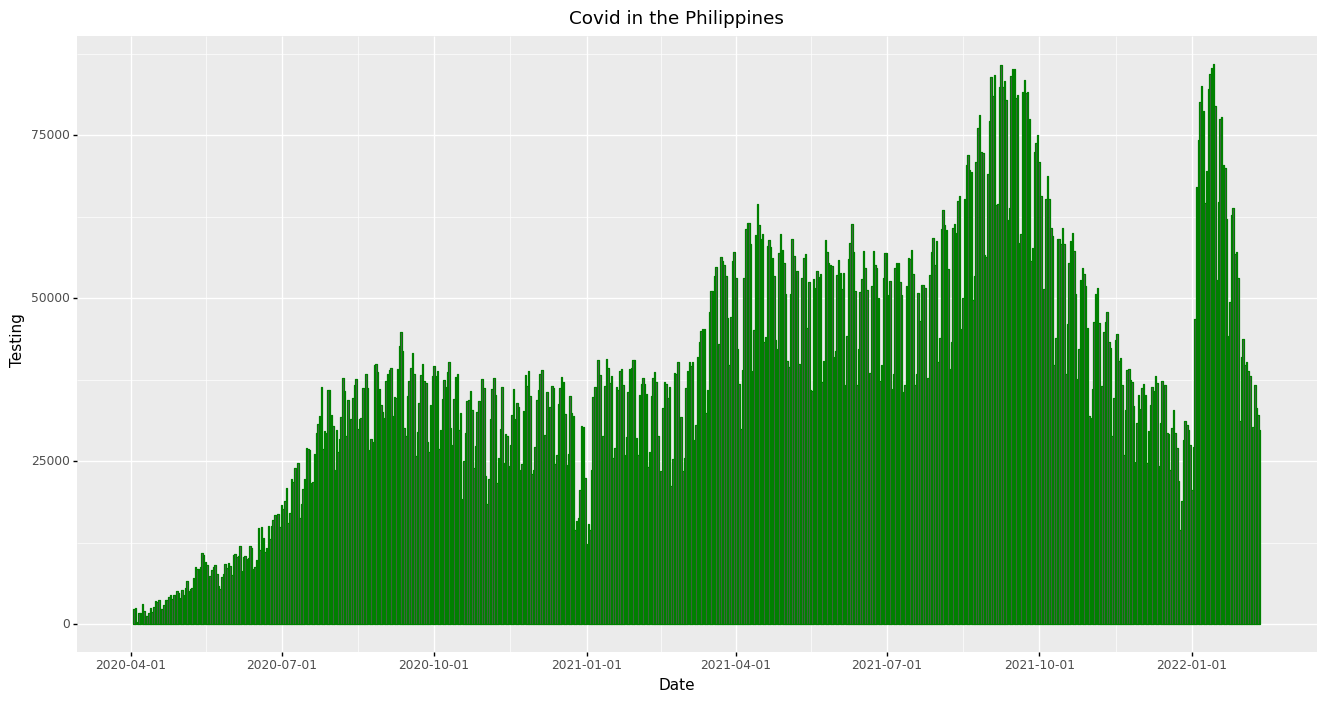

<ggplot: (370057673)>

In [47]:
#Plotnine chart
(
    ggplot(daily_test, aes('report_date', 'daily_output_unique_individuals')) +
           geom_col(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Covid in the Philippines")
)

Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

Shows last 15 days.

In [48]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().tail(15)

report_date
2022-01-28    60017.0
2022-01-29    55815.0
2022-01-30    34265.0
2022-01-31    43236.0
2022-02-01    45888.0
2022-02-02    42103.0
2022-02-03    42809.0
2022-02-04    40980.0
2022-02-05    40908.0
2022-02-06    25064.0
2022-02-07    31775.0
2022-02-08    39138.0
2022-02-09    34862.0
2022-02-10    33745.0
2022-02-11    32065.0
Freq: D, Name: daily_output_samples_tested, dtype: float64

# Two-week rolling average in testing

Shows last 10 days.

In [49]:
test_roll = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().to_frame().reset_index()
test_roll.tail(10)

,report_date,daily_output_unique_individuals
670,2022-02-02,53239.0
671,2022-02-03,51078.0
672,2022-02-04,48854.0
673,2022-02-05,47128.0
674,2022-02-06,45676.0
675,2022-02-07,44312.0
676,2022-02-08,42453.0
677,2022-02-09,40264.0
678,2022-02-10,38499.0
679,2022-02-11,36550.0


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 13 rows containing missing values.


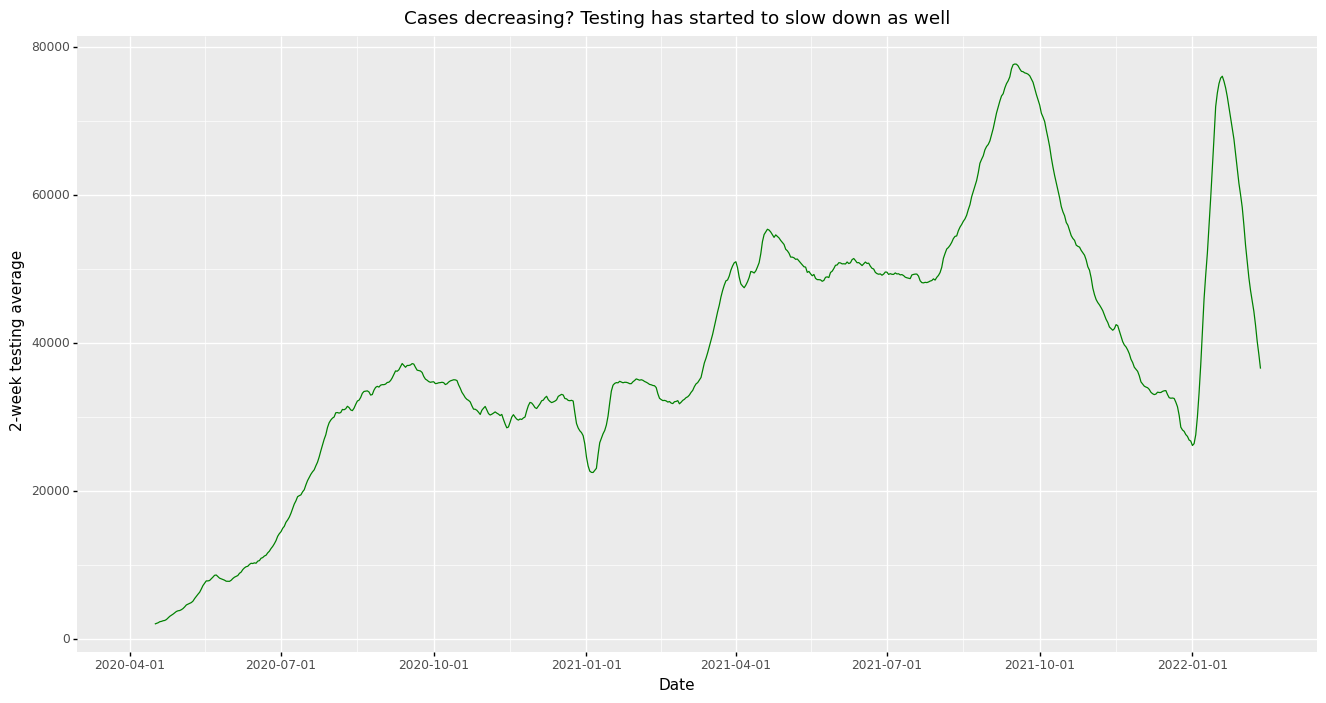

<ggplot: (369352377)>

In [50]:
(
    ggplot(test_roll, aes('report_date', 'daily_output_unique_individuals')) +
           geom_line(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="2-week testing average", title="Cases decreasing? Testing has started to slow down as well")
)

# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [51]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2022-01-31    1963559.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571579.0
2021-07-31    1534758.0
2021-05-31    1525652.0
2021-06-30    1511158.0
2021-03-31    1378529.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1014680.0
2021-12-31     943242.0
2020-12-31     929690.0
2021-02-28     907141.0
2020-11-30     894039.0
2020-07-31     768793.0
2022-02-28     386426.0
2020-06-30     360407.0
2020-05-31     232175.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

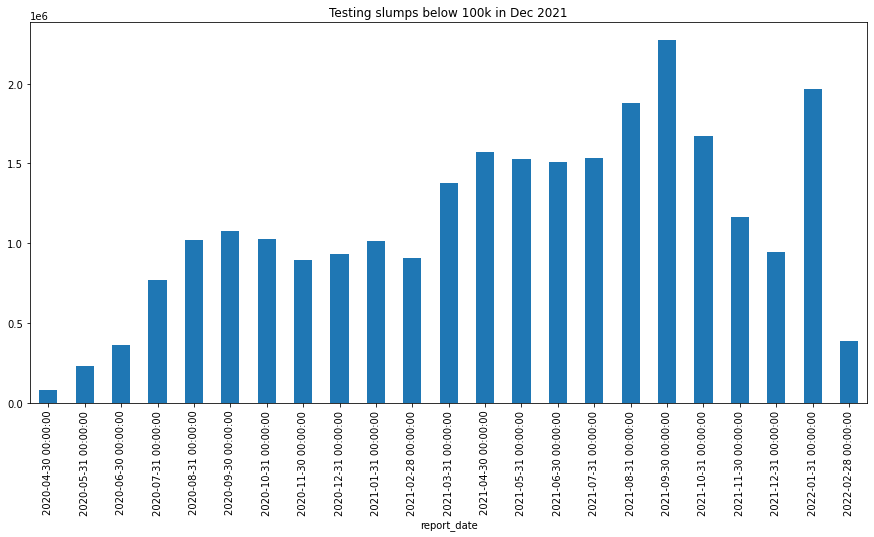

In [52]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 15

### Cumulative

In [53]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)

facility_name
Detoxicare Molecular Diagnostics Laboratory                               181071.0
Philippine Red Cross - Port Area                                          176743.0
Philippine Red Cross (PRC)                                                101011.0
Baguio General Hospital and Medical Center                                 86316.0
Research Institute for Tropical Medicine (RITM)                            78012.0
Jose B. Lingad Memorial General Hospital                                   72984.0
Philippine Red Cross Logistics & Multipurpose Center                       72762.0
Chinese General Hospital                                                   69459.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     64986.0
Southern Philippines Medical Center (SPMC)                                 62122.0
Cagayan Valley Medical Center Molecular Laboratory                         61999.0
Ilocos Training and Regional Medical Center                              

### Monthly 

Ranked from highest to lowest number of tests.

In [54]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)


facility_name                                   report_date
Detoxicare Molecular Diagnostics Laboratory     2022-01-31     35108.0
Philippine Red Cross - Port Area                2021-09-30     27547.0
                                                2022-01-31     26081.0
                                                2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory     2021-09-30     21316.0
Philippine Red Cross - Port Area                2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory     2021-04-30     18665.0
The Lord's Grace Medical and Industrial Clinic  2022-01-31     18634.0
Philippine Red Cross (PRC)                      2021-09-30     18480.0
Ilocos Training and Regional Medical Center     2021-09-30     17270.0
Philippine Airport Diagnostic Laboratory        2022-01-31     15908.0
Baguio General Hospital and Medical Center      2021-09-30     15865.0
Philippine Red Cross - Port Area                2021-03-31     15852.0
Detoxicare Molecu

### Per testing site per month

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

Make it per day by just changing **'M'** in **resample** to **'D'**.

In [55]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4583.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31    26081.0
2022-02-28      471.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [56]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(15)

report_date
2022-01-28    17842.0
2022-01-29    15133.0
2022-01-30     8983.0
2022-01-31    10181.0
2022-02-01    10929.0
2022-02-02     9367.0
2022-02-03     9352.0
2022-02-04     8304.0
2022-02-05     7187.0
2022-02-06     3875.0
2022-02-07     4980.0
2022-02-08     5543.0
2022-02-09     4878.0
2022-02-10     4588.0
2022-02-11     3534.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [57]:
df_test.avg_turnaround_time.value_counts().head(3)

48.0    39115
24.0    33896
72.0     8135
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [58]:
#Creating a new df to process in plotnine
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos2 = df_pos.to_frame().reset_index()

#Renaming the columns because one of them is '0'
df_pos2.columns = ['date', 'testing']
df_pos2.tail(10)


,date,testing
670,2022-02-02,23.598025
671,2022-02-03,23.244022
672,2022-02-04,21.350886
673,2022-02-05,18.899232
674,2022-02-06,16.193063
675,2022-02-07,16.461177
676,2022-02-08,15.097783
677,2022-02-09,14.717596
678,2022-02-10,14.307544
679,2022-02-11,11.867025


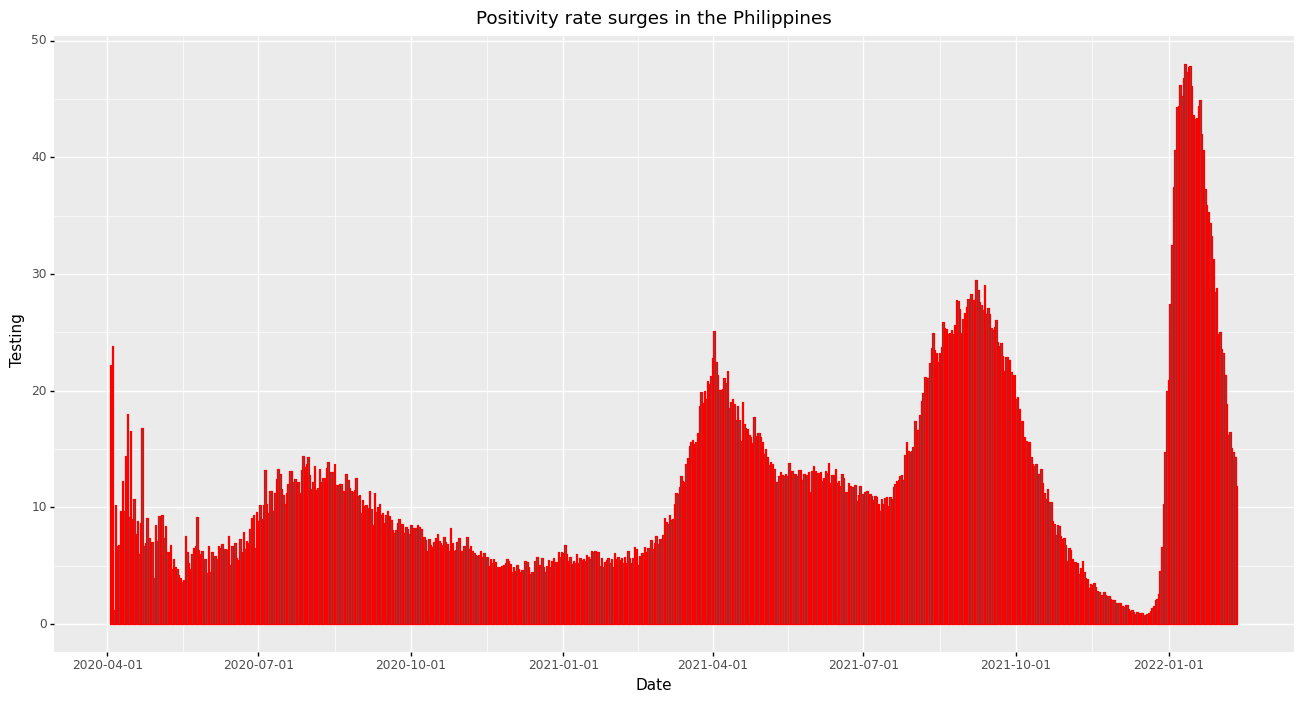

<ggplot: (369963423)>

In [59]:
(
    ggplot(df_pos2, aes('date', 'testing')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Positivity rate surges in the Philippines")
)

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### Entire case file from DOH

In [54]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [55]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [56]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")